# Google Trends: Amazon and Online Retail

### Objective: 
- Use Google Trends to see if there was an increase of Amazon keywords searched in 2020 in comparison to years previous

#### Steps:
- Create a list of keywords to look up (prime, shipping, online shopping, delivery, amazon)
- Graph the trends to the Google Trends library
    - Need to group the trend list into group of 5 (because the max. number of keywords you can look up is 5)
    - This is what `group_list_by_size()` does
- Separate the library results to a list of dataframes for each keyword
    - `get_trend_df_list()`
- Plot out each dataframe with a linear regression line to see the general trend


__Note__: Please run all cells for the graphs to show up.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
from sklearn.linear_model import LinearRegression

In [3]:
def group_list_by_size(trend_list, list_size):
    # This groups any one dimensional list and groups it into lists with length of up to list_size
    if not trend_list:
        return []
    if len(trend_list) < list_size:
        return [trend_list]
    data_list_list = list([list(x) for x in zip(*[iter(trend_list)] * list_size)])
    if len(trend_list) % list_size != 0:
        data_list_list.append(trend_list[-(len(trend_list) % list_size):])
    return data_list_list


In [9]:
def get_trend_df_list(trend_list, time_frame):

    py_trends = TrendReq(hl='en-US', tz=360, timeout=(10, 25))
    trends_df_list = []
    for trend in trend_list:

        py_trends.build_payload(
            [trend],
            cat=0,
            timeframe=time_frame,
            geo="US",
            gprop=""
        )

        trends_df = py_trends.interest_over_time()
        trends_df = trends_df.drop(["isPartial"], axis=1)

        for col in trends_df.columns:
            trends_df_list.append(trends_df[[col]])

    return trends_df_list

In [12]:
def show_trends(init_trend_list, time_frame, graph_individually=False):

    def update_and_show_graph():
        plt.xlabel("Date")
        plt.ylabel("Searches")
        plt.title("Amazon Keywords on Google Trends")
        plt.legend(loc="upper left")
        plt.grid()
        plt.xticks(rotation=90)

        plt.show()

    trend_df_list = get_trend_df_list(init_trend_list, time_frame)

    for trend, trend_df in zip(init_trend_list, trend_df_list):

        x_list = trend_df.index.factorize()[0].reshape(-1, 1)
        y_list = trend_df[trend].values
        linear_regression = LinearRegression()
        linear_regression.fit(x_list, y_list)
        y_predicted_list = linear_regression.predict(x_list)

        lin_reg_label = "{} linear regression: {}".format(
            trend, "+" if (y_predicted_list[-1] - y_predicted_list[0]) / 2 > 0 else "-")

        plt.plot(trend_df.index, trend_df[trend], label=trend)
        plt.plot(trend_df.index, y_predicted_list, label=lin_reg_label)

        if graph_individually:
            update_and_show_graph()

    if not graph_individually:
        update_and_show_graph()
        

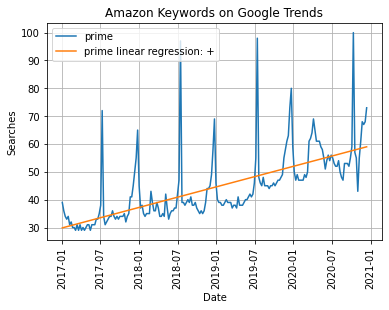

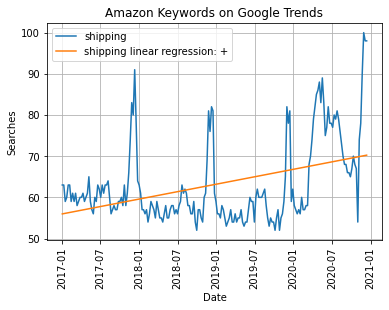

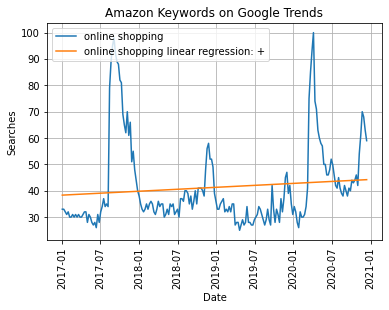

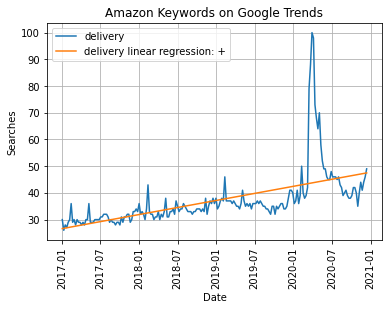

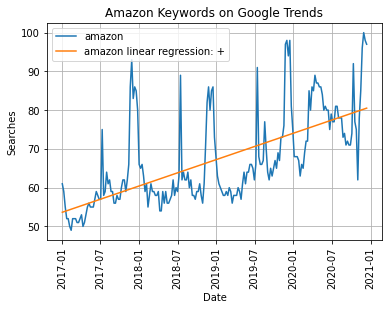

In [13]:
trend_list = [
    "prime",
    "shipping",
    "online shopping",
    "delivery",
    "amazon"
]

show_trends(trend_list,time_frame="2017-01-01 2020-12-15", graph_individually=True)


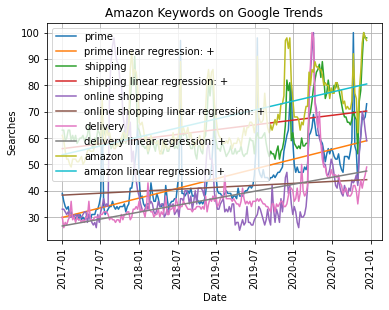

In [26]:
show_trends(trend_list,time_frame="2017-01-01 2020-12-15", graph_individually=False)
# ok, too messy

#  Insights and Analysis: Google Trends Analysis on Amazon Keywords
As we can see, all five keywords seem to have an upward trend since 2017. Overall, there are more individuals searching up Amazon keywords each year. Let's look into each of the five keywords and see if there are any changes in 2020.

 
<font color=red> It's important to note that: the search metric of that keyword is a percentage relative to the most searched within the time frame.</font>

#### Graph legends
- <font color=blue> __Blue line__</font>: Searches of keywords as a percent 
- <font color=orange>__Orange line__</font>: Linear regression

### 1. "Prime" on Google Trends

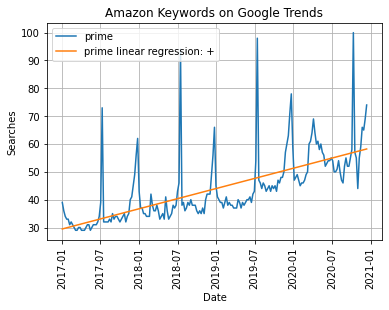

In [14]:
show_trends([trend_list[0]],time_frame="2017-01-01 2020-12-15", graph_individually=True)

We can see that "prime" has a seasonal trend. January and July consistently have peaks each year. However, in 2020, the typical pattern changes. There is another peak in March 2020 (possibly due to COVID and Stay-At-Home). October 2020 is the max interest at 100, suggesting that Amazon's Prime Day did exceptionally well.

### 2. "Shipping" on Google Trends

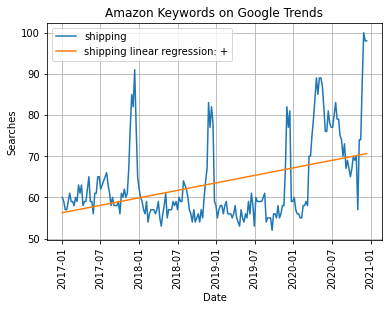

In [20]:
show_trends([trend_list[1]],time_frame="2017-01-01 2020-12-15", graph_individually=True)

Again, there is a seasonal trend for the word "shipping." During the holiday season, Google Trends notes the higher interest in shipping-- probably due to shipping gifts and holiday deals like Black Friday and Christmas. Once again, 2020 does not follow the usual pattern, with high peaks since March 2020. The lowest point of 2020 is high in comparison to previous years' lows. There have been news about delayed shipping due to COVID, and this greatly impacts Amazon Prime's two-day shipping. However, it seems like Amazon's business was still stable during these unprecedented times.

### 3. "Online Shopping" on Google Trends

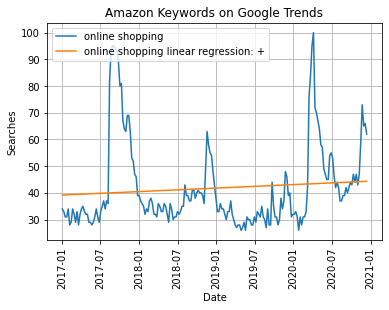

In [21]:
show_trends([trend_list[2]],time_frame="2017-01-01 2020-12-15", graph_individually=True)

Among the five keywords, "online shopping" may have the smallest increase based on the regression line. Additionally, there does not seem to be an obvious annual pattern like we see in the first two keywords. This may be due to the fact that online shopping is not only associated with Amazon. Therefore, this keyword's slight increase in interest does not suggest much to Amazon's performance and overall interest. 

### 4. "Delivery" on Google Trends

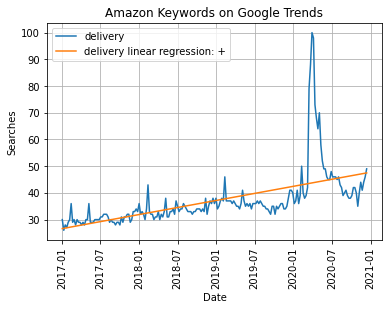

In [22]:
show_trends([trend_list[3]],time_frame="2017-01-01 2020-12-15", graph_individually=True)

First, this keyword had a _huge_ peak in March 2020. The next highest peak was in March 2019 at 45%. The interest was very high in March 2020 because deliveries were uncertain during a world crisis. Additionally, note that the blue line overlaps the orange line quite closely until 2020. Since 2020, there is more volatility in the interest. Moreover, 2020's lowest interest is still relatively high in comparison to previous years' lows.

### 5. "Amazon" on Google Trends

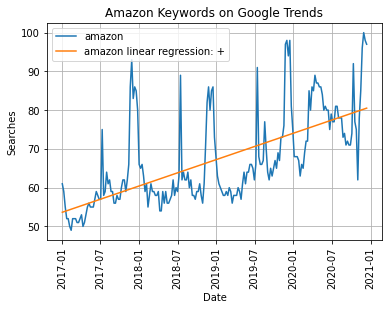

In [23]:
show_trends([trend_list[4]],time_frame="2017-01-01 2020-12-15", graph_individually=True)

Hmm, doesn't this pattern look familiar? 
Let's graph "amazon" and "prime" together.

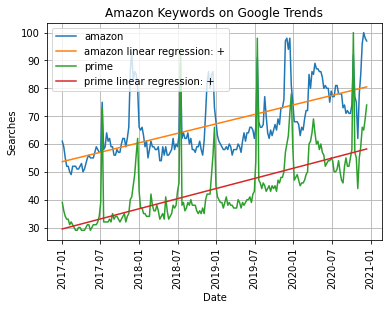

In [25]:
show_trends(["amazon","prime"],time_frame="2017-01-01 2020-12-15", graph_individually=False)

We can see that "prime" and "amazon" have similar seasonal trends-- it's practically identical. The regression lines almost have the same slopes. The major difference is that Prime has higher peaks in relation to the lows. January and July consistently have peaks each year. Once again, the change of pattern in 2020 is almost the same too. This suggests that those interested in Prime are probably interested in Amazon too. 

# Expectations and Next Steps
After looking into the Google Trends data, the results do not seem that surprising. Amazon is doing well. People rely on Amazon for many of their online retail needs. However, could individuals who are using Amazon for online shopping be the _only_ reason we see Amazon thriving during these times? In addition to being a large retail giant, Amazon also hosts cloud resources. __Amazon Web Services, or AWS__, provides for technology solutions for many companies. Let's take a look into their performance in 2020 with the `analysis_notebook_04_aws_client_stock_analysis` notebook. 